In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def ImageShow(imageTitle, image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(imageTitle)
    plt.grid(False)
    plt.tight_layout()
    plt.show()

In [3]:
image_argument = {"Image": "dog.3877.jpg"}

In [4]:
imageData = cv2.imread(image_argument['Image'])

In [5]:
(height, width, color_ch) = imageData.shape[:3]

In [6]:
print("Image Height: ", height)
print("Image Width: ", width)
print("Image Ch: ", color_ch)

Image Height:  500
Image Width:  489
Image Ch:  3


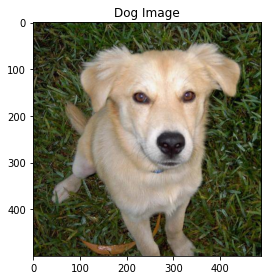

In [7]:
ImageShow("Dog Image" , imageData)

In [8]:
(blue, green, red) = imageData[0,0]

In [9]:
image = cv2.imread("dog.3877.jpg")

In [10]:
print("Image Color Information: ")
print("Image Blue Color :", blue)
print("Image Gree Color :", green)
print("Image Red Color :", red)

Image Color Information: 
Image Blue Color : 80
Image Gree Color : 102
Image Red Color : 83


In [11]:
(blue, green, red) = imageData[50, 30]

In [12]:
print("Image Color Information: ")
print("Image Blue Color :", blue)
print("Image Gree Color :", green)
print("Image Red Color :", red)

Image Color Information: 
Image Blue Color : 0
Image Gree Color : 6
Image Red Color : 16


In [13]:
#(BGR) = (0, 0, 255)
imageData[50, 30] = (20, 1, 3)

In [14]:
print("Image Color Information: ")
print("Image Blue Color :", blue)
print("Image Gree Color :", green)
print("Image Red Color :", red)

Image Color Information: 
Image Blue Color : 0
Image Gree Color : 6
Image Red Color : 16


In [15]:
(imageHeight, imageWidth) = imageData.shape[:2]

In [16]:
(information_of_x, information_of_y) = (imageHeight//2, imageWidth//2)

In [17]:
print("information of x: ", information_of_x)
print("information of y: ", information_of_y)

information of x:  250
information of y:  244


# Cropping Image into 2*2

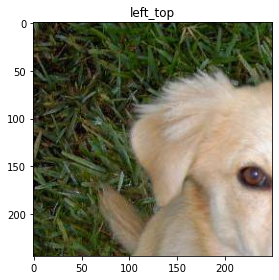

In [18]:
left_top = imageData[0: information_of_y, 0: information_of_x]
ImageShow("left_top", left_top)

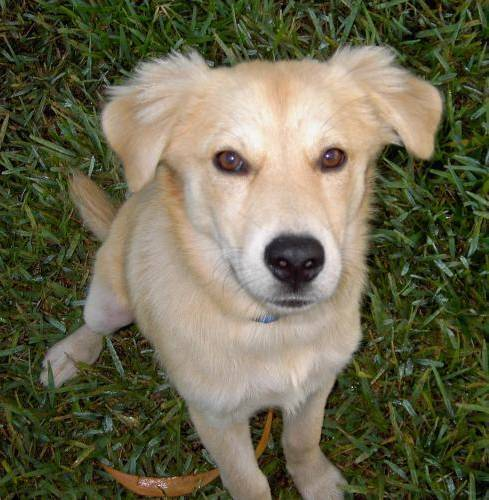

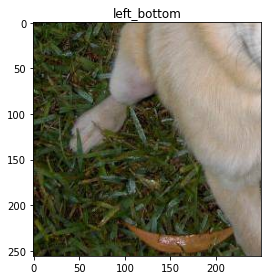

In [19]:
left_bottom = imageData[information_of_y:imageHeight, 0:information_of_x]
ImageShow("left_bottom", left_bottom)

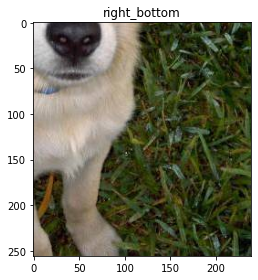

In [20]:
right_bottom = imageData[information_of_y:imageHeight, information_of_x:imageWidth]
ImageShow("right_bottom", right_bottom)

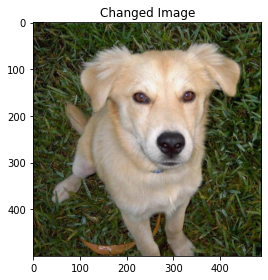

In [21]:
imageData[0: information_of_y//100, information_of_x//10:imageWidth] = (255, 255, 255)
ImageShow("Changed Image",imageData)

In [22]:
imageData.shape

(500, 489, 3)

In [23]:
imageArea = np.zeros((300, 300, 3), dtype = "uint8")

# Image Modification

In [24]:
imageData = cv2.imread(image_argument['Image'])

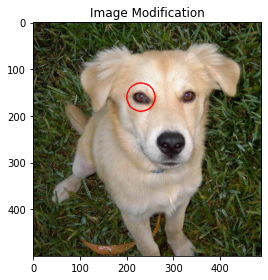

In [25]:
cv2.circle(imageData, (230, 160), 30, (0, 0, 255), 2)
ImageShow("Image Modification", imageData)

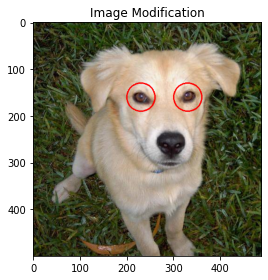

In [26]:
cv2.circle(imageData, (330, 160), 30, (0, 0, 255), 2)
ImageShow("Image Modification", imageData)

# 01. HW --> For loop for 25 image with (5 X 5) for save

In [27]:
center = (width, height)
angle = 0
scale = 1
img_number = 0

for i in range(25):
    if i < 10:
        M = cv2.getRotationMatrix2D(center, angle + (i*2), scale)
        rotated = cv2.warpAffine(imageData, M, (width, height))
        cv2.imwrite("SavedImages/"+"Dog-"+str(img_number)+".png", rotated)
        img_number +=1
    else:
        M = cv2.getRotationMatrix2D(center, angle - (i*1.3), scale)
        rotated = cv2.warpAffine(imageData, M, (width, height))
        cv2.imwrite("SavedImages/"+"Dog-"+str(img_number)+".png", rotated)
        img_number +=1

In [28]:
def datasetLoaderFromDirectory():
    #Load datasets from folder
    path = "SavedImages/"
    
    fig = plt.figure(figsize=(10, 10))
    #fig.suptitle("Image Show in 5 by 5 Grid", fontsize = 20 )
    
    i=1
    for file in os.listdir(path):
        image = cv2.imread(os.path.join(path, file))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (224,224))
        plt.subplot(5, 5, i)
        plt.xticks([])
        plt.yticks([])
        plt.grid(True)
        plt.tight_layout()
        plt.title(file)
        plt.imshow(image)
        i=i+1
    plt.show()

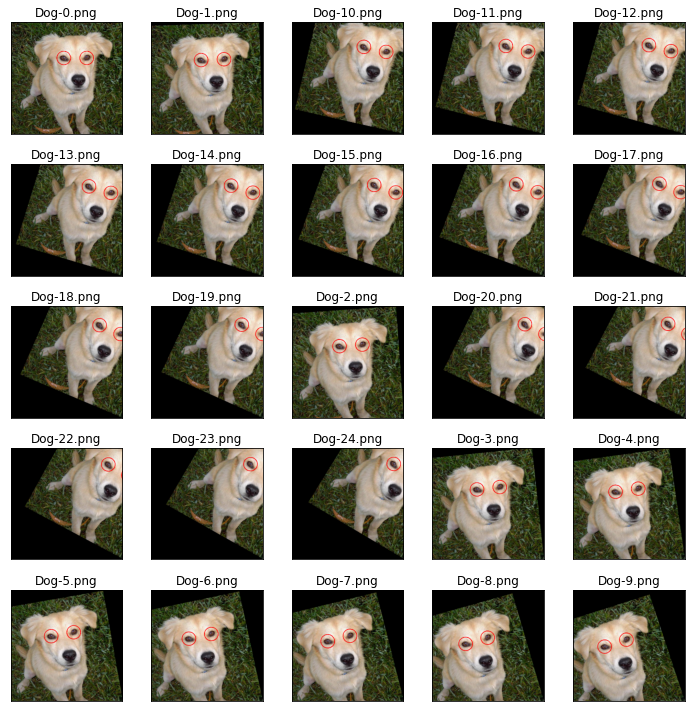

In [29]:
datasetLoaderFromDirectory()